# Libraries

! pip install numpy pandas sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

# Import data

## X

In [15]:
# For training the model
X_train_realmean = pd.read_csv("../X/Xtrainmean.csv", index_col=[0])

# For cross validation
X_valid_realmean = pd.read_csv("../X/Xvalidmean.csv", index_col=[0])

# For prediction
X_test_realmean = pd.read_csv("../X/Xtestmean.csv", index_col=[0])

## Task 1

In [3]:
y_train_t1 = pd.read_csv("../Task1/Y_train.csv")
y_valid_t1 = pd.read_csv("../Task1/Y_valid.csv")

In [4]:
y_train_t1_value=y_train_t1["mort_icu"]
y_valid_t1_value=y_valid_t1["mort_icu"]

## Task 2

In [5]:
y_train_t2 = pd.read_csv("../Task2/Y_train.csv")
y_valid_t2 = pd.read_csv("../Task2/Y_valid.csv")

In [6]:
y_train_t2_value=y_train_t2["los_icu"]
y_valid_t2_value=y_valid_t2["los_icu"]

# Data Pre-processing

In [13]:
X_train_realmean

,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,...,tidal volume set,tidal volume spontaneous,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine
3_145834_211552,-0.254460,-1.979855,0.0,0.0,0.0,-0.318615,0.931458,-0.226618,0.000000,-1.694872,...,0.440628,0.000000,0.0,0.0,0.0,0.000000,0.0,1.026004,0.634186,0.160067
6_107064_228232,-0.256599,-0.251806,0.0,0.0,0.0,-0.422405,1.723627,-0.254291,-0.742403,-1.444821,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.181589,0.000000
9_150750_220597,-0.269432,0.000000,0.0,0.0,0.0,-0.367050,-0.330641,-0.271686,2.097036,1.019964,...,1.039571,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.181589,0.000000
11_194540_229441,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.088963,0.000000,0.000000,0.484141,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.139623,0.000000
12_112213_232669,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.240269,0.000000,0.000000,-1.694872,...,0.680205,-1.333059,0.0,0.0,0.0,-0.317391,0.0,0.000000,-0.414731,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99966_167228_252173,0.000000,1.044231,0.0,0.0,0.0,0.000000,-0.572320,0.000000,0.290121,0.091204,...,0.000000,0.000000,0.0,0.0,0.0,-0.361918,0.0,0.584864,-0.156720,0.000000
99973_150202_275083,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.290362,0.000000,-0.677870,-2.230694,...,0.000000,0.000000,0.0,0.0,0.0,-0.364145,0.0,0.973702,0.429243,0.000000
99982_151454_221194,-0.260876,1.044231,0.0,0.0,0.0,-0.297857,-0.330641,-0.261407,0.000000,1.448622,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.443803,-0.682067,0.000000
99991_151118_226241,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.753579,0.000000,0.000000,-0.051682,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.782719,-0.633884,-0.303768


## Process 2: Elimination of features containing 70% 0 value (call is"nozero") and Imputation

In [16]:
# Eliminate feature containing 70% 0 value
import copy
X_train_nozero=copy.deepcopy(X_train_realmean)
X_valid_nozero=copy.deepcopy(X_valid_realmean)
X_test_nozero=copy.deepcopy(X_test_realmean)
for i in X_train_realmean.columns:
    if (X_train_nozero[i] == 0).sum()> 12000:
        X_train_nozero.drop(i, axis=1, inplace=True)

headnozero=list(X_train_nozero.columns.values)
X_valid_nozero = X_valid_nozero[X_train_nozero.columns]
X_test_nozero = X_test_nozero[X_train_nozero.columns]

In [17]:
# Impute the 0 with mean
imp = SimpleImputer(missing_values=0, strategy='mean')
X_train_nozero = pd.DataFrame(imp.fit_transform(X_train_nozero))
X_train_nozero.columns=headnozero
X_valid_nozero = pd.DataFrame(imp.fit_transform(X_valid_nozero))
X_valid_nozero.columns=headnozero
X_test_nozero = pd.DataFrame(imp.fit_transform(X_test_nozero))
X_test_nozero.columns=headnozero
X_train_nozero

,alanine aminotransferase,albumin,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,bilirubin,blood urea nitrogen,calcium,...,respiratory rate set,sodium,systolic blood pressure,temperature,tidal volume observed,tidal volume set,tidal volume spontaneous,troponin-t,weight,white blood cell count
0,-0.254460,-1.979855,-0.318615,0.931458,-0.226618,0.014621,-1.694872,-0.298127,0.792807,-1.004507,...,0.280562,0.260075,-0.638602,-0.002273,0.800876,0.440628,0.000309,-0.053738,1.026004,0.634186
1,-0.256599,-0.251806,-0.422405,1.723627,-0.254291,-0.742403,-1.444821,-0.444605,1.737977,-0.016061,...,-0.075873,-0.417323,1.537514,-0.518339,0.069184,0.052263,0.000309,-0.053738,-0.010417,-0.181589
2,-0.269432,0.061017,-0.367050,-0.330641,-0.271686,2.097036,1.019964,-0.395779,-0.439621,0.636039,...,-0.133014,-0.047833,1.723172,0.101098,0.801063,1.039571,0.000309,-0.053738,-0.010417,-0.181589
3,-0.140093,0.061017,-0.052863,-0.088963,-0.136461,0.014621,0.484141,-0.115158,-0.439621,0.910607,...,-0.075873,0.598773,-0.661305,-0.188482,0.069184,0.052263,0.000309,-0.053738,-0.010417,-0.139623
4,-0.140093,0.061017,-0.052863,1.240269,-0.136461,0.014621,-1.694872,-0.115158,0.348021,0.224186,...,0.035793,0.875890,0.603034,-0.157922,0.476344,0.680205,-1.333059,-0.317391,-0.010417,-0.414731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,-0.140093,1.044231,-0.052863,-0.572320,-0.136461,0.290121,0.091204,-0.115158,-0.200239,0.407232,...,-0.075873,-0.232578,0.667703,-1.013160,0.069184,0.052263,0.000309,-0.361918,0.584864,-0.156720
16756,-0.140093,0.061017,-0.052863,-0.290362,-0.136461,-0.677870,-2.230694,-0.115158,-0.331513,-0.599519,...,-0.075873,0.260075,-0.389591,-0.067515,0.069184,0.052263,0.000309,-0.364145,0.973702,0.429243
16757,-0.260876,1.044231,-0.297857,-0.330641,-0.261407,0.014621,1.448622,-0.151648,0.116362,0.361470,...,-0.075873,-0.546644,-1.128922,-0.353408,0.069184,0.052263,0.000309,-0.053738,-0.443803,-0.682067
16758,-0.140093,0.061017,-0.052863,-0.753579,-0.136461,0.014621,-0.051682,-0.115158,-0.219544,-0.788284,...,-0.075873,1.014449,2.021813,0.149653,0.069184,0.052263,0.000309,-0.053738,0.782719,-0.633884


## Process 3: Lasso feature selection

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_nozero)
sel_ = SelectFromModel(
    LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
X_train_selected = pd.DataFrame(sel_.transform(scaler.transform(X_train_nozero)))

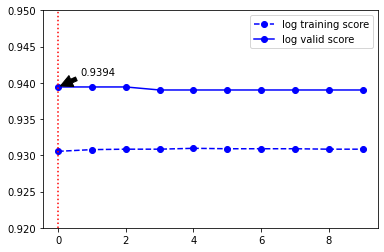

In [19]:
import matplotlib.pyplot as plt
train_log_scores=[]
test_log_scores=[]
for c in range(1,11,1):
    log_ = LogisticRegression(C=0.1*c, penalty='l1', solver='liblinear', random_state=3612)
    log_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
    train_log_scores.append(log_.score(X_train_nozero, y_train_t1_value))
    test_log_scores.append(log_.score(X_valid_nozero, y_valid_t1_value))
plt.plot(train_log_scores, 'bo--')
plt.plot(test_log_scores, 'bo-')
plt.ylim(0.92, 0.95)
plt.legend(["log training score", "log valid score"])
plt.axvline(np.argmax(test_log_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_log_scores).round(4), (np.argmax(test_log_scores), np.max(test_log_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

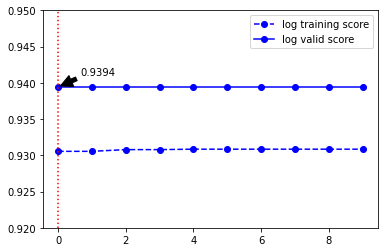

In [20]:
train_log_scores=[]
test_log_scores=[]
for c in range(1,11,1):
    log_ = LogisticRegression(C=0.1*c, penalty='l1', solver='saga', random_state=3612)
    log_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
    train_log_scores.append(log_.score(X_train_nozero, y_train_t1_value))
    test_log_scores.append(log_.score(X_valid_nozero, y_valid_t1_value))
plt.plot(train_log_scores, 'bo--')
plt.plot(test_log_scores, 'bo-')
plt.ylim(0.92, 0.95)
plt.legend(["log training score", "log valid score"])
plt.axvline(np.argmax(test_log_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_log_scores).round(4), (np.argmax(test_log_scores), np.max(test_log_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [21]:
scaler = StandardScaler()
scaler.fit(X_train_nozero)
log_=LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=3612)
sel_ = SelectFromModel(log_)
sel_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
X_train_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_train_nozero)))
X_valid_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_valid_nozero)))
X_test_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_test_nozero)))
cols=sel_.get_support(indices=True)
headnozero_new=[]
for i in cols:
    headnozero_new.append(headnozero[i])
X_train_selected_t1.columns=headnozero_new
X_valid_selected_t1.columns=headnozero_new
X_test_selected_t1.columns=headnozero_new
X_train_selected_t1

,alanine aminotransferase,albumin,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,bilirubin,blood urea nitrogen,calcium,...,respiratory rate,respiratory rate set,sodium,systolic blood pressure,temperature,tidal volume observed,tidal volume set,troponin-t,weight,white blood cell count
0,-0.286414,-3.364543e+00,-4.668067e-01,1.287299,-0.229497,1.649481e-17,-2.050998,-0.322341,0.934671,-1.793228,...,-1.507556,0.450046,0.287380,-0.833087,0.126241,1.198413,6.235952e-01,0.000000,1.283108e+00,0.768159
1,-0.291771,-5.157137e-01,-6.491195e-01,2.290083,-0.299940,-1.199707e+00,-1.765362,-0.580397,1.964341,-0.097147,...,-1.471375,0.000000,-0.560840,1.999349,-0.596546,0.000000,-3.342525e-17,0.000000,-1.073808e-17,-0.190810
2,-0.323910,-1.143933e-17,-5.518860e-01,-0.310355,-0.344219,3.300145e+00,1.050202,-0.494378,-0.407936,1.021795,...,-1.208213,-0.072147,-0.098174,2.241001,0.271020,1.198719,1.585315e+00,0.000000,-1.073808e-17,-0.190810
3,0.000000,-1.143933e-17,1.218853e-17,-0.004421,0.000000,1.649481e-17,0.438123,0.000000,-0.407936,1.492929,...,-0.104672,0.000000,0.711490,-0.862638,-0.134558,0.000000,-3.342525e-17,0.000000,-1.073808e-17,-0.141478
4,0.000000,-1.143933e-17,1.218853e-17,1.678215,0.000000,1.649481e-17,-2.050998,0.000000,0.450121,0.315094,...,-1.021502,0.140993,1.058489,0.783028,-0.091757,0.666874,1.008283e+00,-0.525055,-1.073808e-17,-0.464876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,0.000000,1.620908e+00,1.218853e-17,-0.616289,0.000000,4.366027e-01,-0.010735,0.000000,-0.147154,0.629184,...,-0.839380,0.000000,-0.329507,0.867201,-1.289578,0.000000,-3.342525e-17,-0.613730,7.369685e-01,-0.161576
16756,0.000000,-1.143933e-17,1.218853e-17,-0.259366,0.000000,-1.097438e+00,-2.663078,0.000000,-0.290164,-1.098306,...,0.002838,0.000000,0.287380,-0.508974,0.034865,0.000000,-3.342525e-17,-0.618163,1.218356e+00,0.527242
16757,-0.302484,1.620908e+00,-4.303441e-01,-0.310355,-0.318055,1.649481e-17,1.539866,-0.064286,0.197751,0.550661,...,-0.543767,0.000000,-0.722773,-1.471289,-0.365548,0.000000,-3.342525e-17,0.000000,-5.365386e-01,-0.779138
16758,0.000000,-1.143933e-17,1.218853e-17,-0.845740,0.000000,1.649481e-17,-0.173956,0.000000,-0.168185,-1.422211,...,1.465877,0.000000,1.231989,2.629713,0.339025,0.000000,-3.342525e-17,0.000000,9.819162e-01,-0.722498


In [23]:
X_train_selected_t2=X_train_nozero
X_test_selected_t2=X_test_nozero
X_valid_selected_t2=X_valid_nozero

## Normalization

In [24]:
scaler = preprocessing.StandardScaler()

X_train_selected_t1=X_train_selected_t1.values
X_train_selected_t1_scaled = scaler.fit_transform(X_train_selected_t1)
X_train_selected_t1_norm=pd.DataFrame(X_train_selected_t1_scaled)

X_train_selected_t2=X_train_selected_t2.values
X_train_selected_t2_scaled = scaler.fit_transform(X_train_selected_t2)
X_train_selected_t2_norm=pd.DataFrame(X_train_selected_t2_scaled)

X_valid_selected_t1=X_valid_selected_t1.values
X_valid_selected_t1_scaled = scaler.fit_transform(X_valid_selected_t1)
X_valid_selected_t1_norm=pd.DataFrame(X_valid_selected_t1_scaled)

X_valid_selected_t2=X_valid_selected_t2.values
X_valid_selected_t2_scaled = scaler.fit_transform(X_valid_selected_t2)
X_valid_selected_t2_norm=pd.DataFrame(X_valid_selected_t2_scaled)

X_test_selected_t1=X_test_selected_t1.values
X_test_selected_t1_scaled = scaler.fit_transform(X_test_selected_t1)
X_test_selected_t1_norm=pd.DataFrame(X_test_selected_t1_scaled)

X_test_selected_t2=X_test_selected_t2.values
X_test_selected_t2_scaled = scaler.fit_transform(X_test_selected_t2)
X_test_selected_t2_norm=pd.DataFrame(X_test_selected_t2_scaled)


# Data report

In [25]:
print("*"*60)
print("There are 6 set of X")
print("X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2")
print("-"*60)
print("Normalized version")
print("X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm")
print("-"*60)
print("There are 4 set of Y")
print("y_train_t1, y_train_t2, y_valid_t1, y_valid_t2")
print("when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'")
print("*"*60)

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************
